# Emotion recognition- RAVDESS dataset

### File Summary

#### In total, the RAVDESS collection includes 7356 files (2880+2024+1440+1012 files).

#### File naming convention

##### Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

#### Filename identifiers 

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

  Filename example: 02-01-06-01-02-01-12.mp4 

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12)
* Female, as the actor ID number is even.

## Import libraries

In [ ]:
import os
import librosa
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import IPython.display as ipd
import librosa.display
import numpy as np

## Import data from the files

In [64]:
lst = []
path = 'C:\\Users\\mary-\\PycharmProjects\\emotion\\Emotion_Recognition\\data'
emotion = []
voc_channel = []
full_path = []
modality = []
intensity = []
actors = []
phrase =[]

for root, dirs, files in tqdm(os.walk(path)):
    for file in files:
        try:
            #Load librosa array, obtain mfcss, store the file and the mfcss information in a new array
            X, sample_rate = librosa.load(os.path.join(root,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
            # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
            # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
           
            modal = int(file[1:2])
            vchan = int(file[4:5])
            lab = int(file[7:8])
            ints = int(file[10:11])
            phr = int(file[13:14])
            act = int(file[19:20])
            
            arr = mfccs, lab
            lst.append(arr)
            
            modality.append(modal)
            voc_channel.append(vchan)
            emotion.append(lab) #only labels
            intensity.append(ints)
            phrase.append(phr)
            actors.append(act)
            
            full_path.append((root, file)) # only files
          # If the file is not valid, skip it
        except ValueError:
            continue

In [58]:
n_files = len(paths)
n_files

2452

# EDA

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

## Decrypting of the file names

In [83]:
# 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
emotions_list = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
emotion_dict = {em[0]+1:em[1] for em in enumerate(emotions_list)}

df = pd.DataFrame([emotion, voc_channel, modality, intensity, actors, phrase, full_path]).T
df.columns = ['emotion', 'voc_channel', 'modality', 'intensity', 'actors', 'phrase', 'path']
df['emotion'] = df['emotion'].map(emotion_dict)
df['voc_channel'] = df['voc_channel'].map({1: 'speech', 2:'song'})
df['modality'] = df['modality'].map({1: 'full AV', 2:'video only', 3:'audio only'})
df['intensity'] = df['intensity'].map({1: 'normal', 2:'strong'})
df['actors'] = df['actors'].apply(lambda x: 'female' if x%2 == 0 else 'male')
df['phrase'] = df['phrase'].map({1: 'Kids are talking by the door', 2:'Dogs are sitting by the door'})

df.head()

,emotion,voc_channel,modality,intensity,actors,phrase,path
0,neutral,speech,audio only,normal,male,Kids are talking by the door,(C:\Users\mary-\PycharmProjects\emotion\Emotio...
1,neutral,speech,audio only,normal,male,Kids are talking by the door,(C:\Users\mary-\PycharmProjects\emotion\Emotio...
2,neutral,speech,audio only,normal,male,Dogs are sitting by the door,(C:\Users\mary-\PycharmProjects\emotion\Emotio...
3,neutral,speech,audio only,normal,male,Dogs are sitting by the door,(C:\Users\mary-\PycharmProjects\emotion\Emotio...
4,calm,speech,audio only,normal,male,Kids are talking by the door,(C:\Users\mary-\PycharmProjects\emotion\Emotio...


## Analysis of the dataframe

In [84]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   emotion      2452 non-null   object
 1   voc_channel  2452 non-null   object
 2   modality     2452 non-null   object
 3   intensity    2452 non-null   object
 4   actors       2452 non-null   object
 5   phrase       2452 non-null   object
 6   path         2452 non-null   object
dtypes: object(7)
memory usage: 134.2+ KB


None

In [71]:
for col in ['emotion', 'voc_channel', 'modality', 'intensity', 'actors', 'phrase']:
    print('\nColumn values for ', col.upper())
    print(df[col].value_counts())


Column values for  EMOTION
angry        376
happy        376
fearful      376
calm         376
sad          376
surprised    192
disgust      192
neutral      188
Name: emotion, dtype: int64

Column values for  VOC_CHANNEL
speech    1440
song      1012
Name: voc_channel, dtype: int64

Column values for  MODALITY
audio only    2452
Name: modality, dtype: int64

Column values for  INTENSITY
normal    1320
strong    1132
Name: intensity, dtype: int64

Column values for  ACTORS
male      1248
female    1204
Name: actors, dtype: int64

Column values for  PHRASE
Dogs are sitting by the door    1226
Kids are talking by the door    1226
Name: phrase, dtype: int64


In [92]:
names= data['actors'].value_counts().index
values= data['actors'].value_counts().values
names, values

(Index(['female', 'male'], dtype='object'), array([96, 96], dtype=int64))

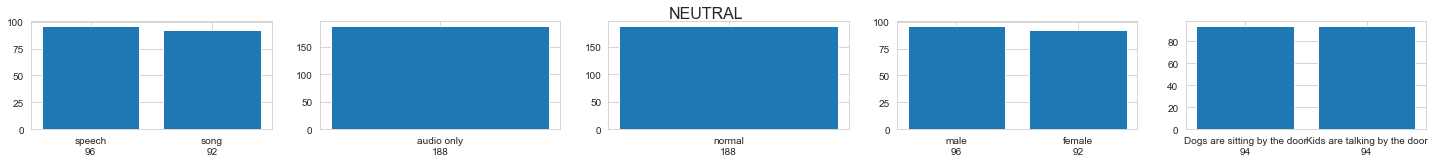

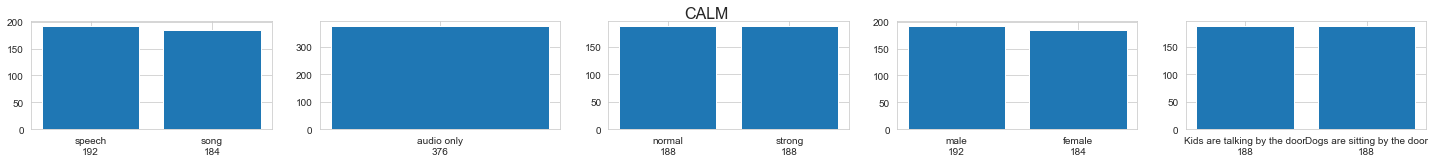

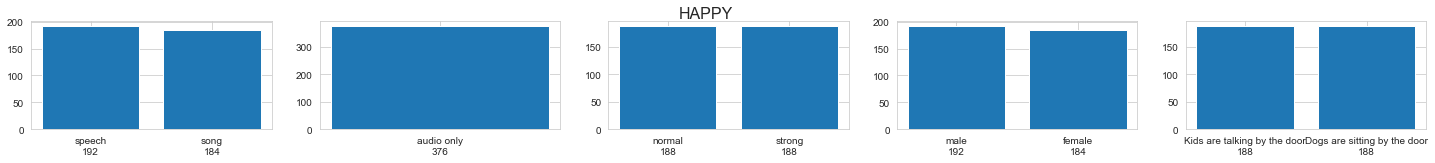

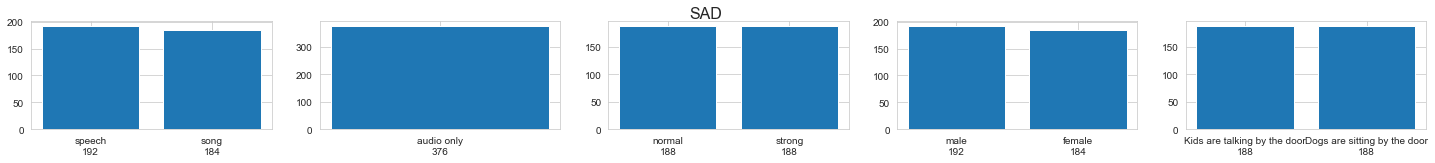

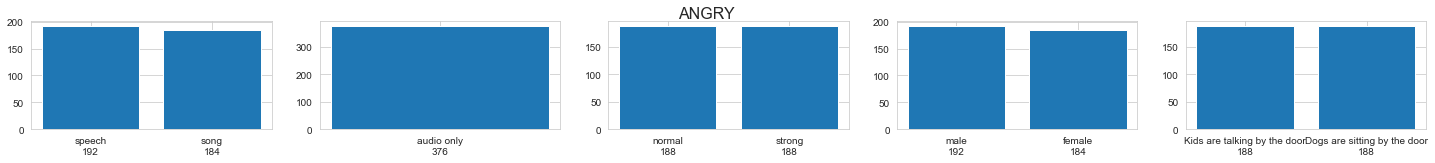

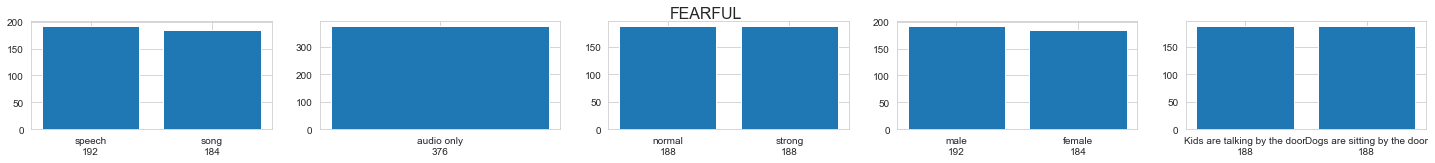

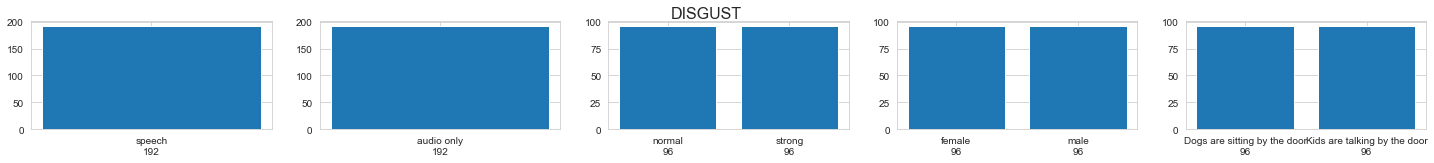

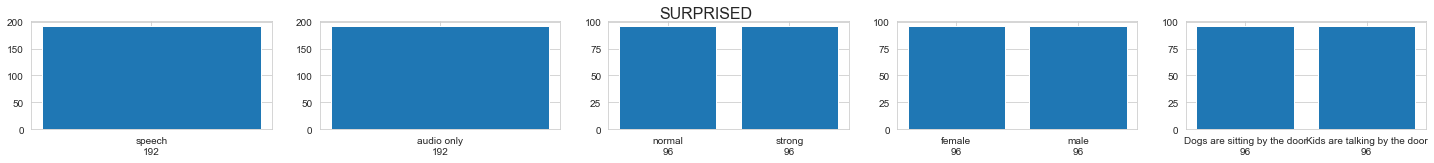

In [105]:
for emotion_ in emotions_list:
    pdata = df.loc[df.emotion == emotion_]
    fig, axs = plt.subplots(1, 5, figsize=(25, 2))
    fig.suptitle(emotion_.upper(), size=16)
    for i, col in enumerate(['voc_channel', 'modality', 'intensity', 'actors', 'phrase']):
        names= pdata[col].value_counts().index
        values= pdata[col].value_counts().values
        names = [n[0]+'\n'+str(n[1]) for n in zip(names,values)]
        axs[i].bar(names, values)
        

## Random sample

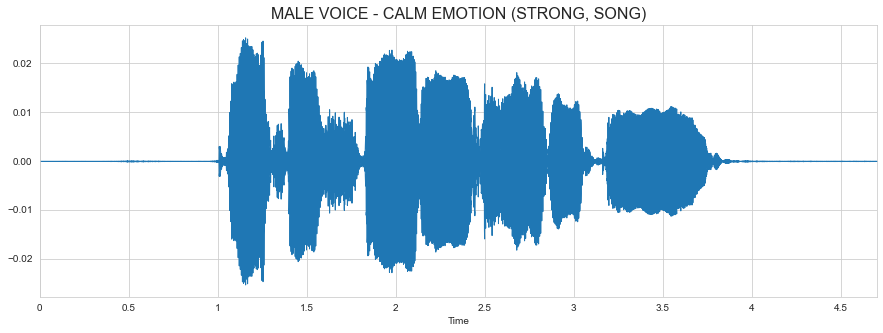

In [108]:
# choose random number
rnd = np.random.randint(0,n_files)

# use the Librosa library to load and plot the random speech
fname = paths[rnd][0] + '\\' + paths[rnd][1] 
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
info = df.iloc[rnd].values
title_txt = f'{info[4]} voice - {info[0]} emotion ({info[3]}, {info[1]})'
plt.title(title_txt.upper(), size=16)
librosa.display.waveplot(data, sr=sampling_rate)

# play the audio 
ipd.Audio(fname)

## Conclusion

* Sound quality is good. There are more male voices than female voices, but in generall the dataset is well-balanced.

* Since two emotions (disgust & surprised) don't have a 'song' format, probably it will be better to use for our model only a 'speech' format.

* From reading a few blogs and articles, it seems female has a higher pitch that male. So if we don't tag the gender label to the audio file, it won't be able to detect anger or fear if it was a male speaker. It will just get bucketed into neutral.



### MFCCS- mel- frequency cepstrum coefficients

### Computing the cepstrum:

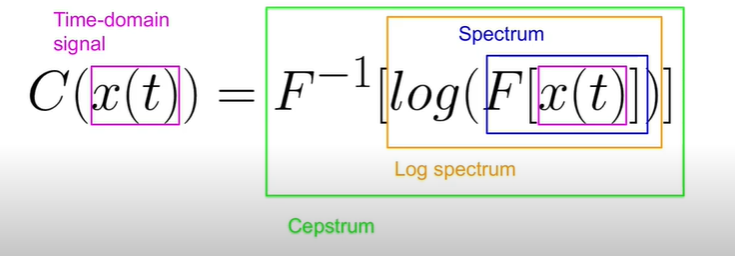

### We're basically trasforming our sound wave to an absolute formation, then create a log which allows us to see the signal's Frequency VS it's Magnitude and allows us to examine periodicities and general trend as well. Lastly were performing an inverse transformation which results in a general spectrum of the signal (Quefrency VS Magnitude).

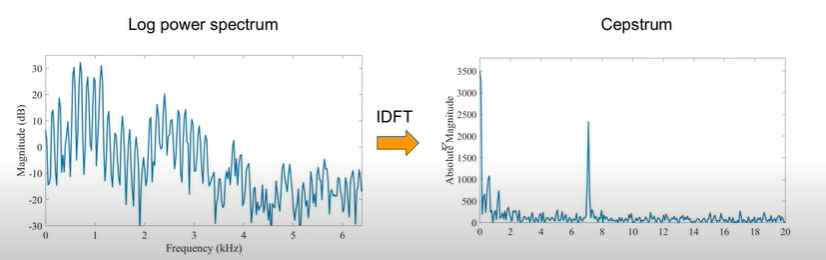

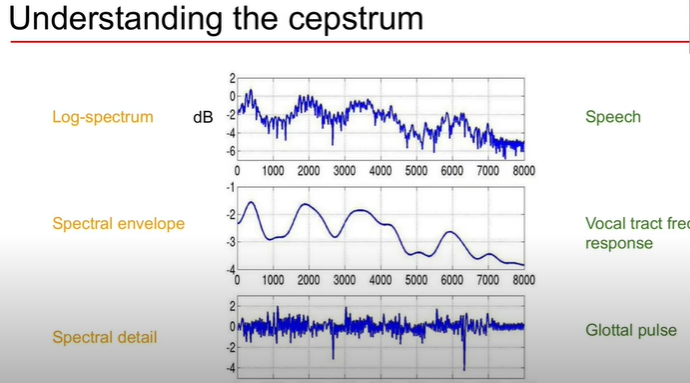

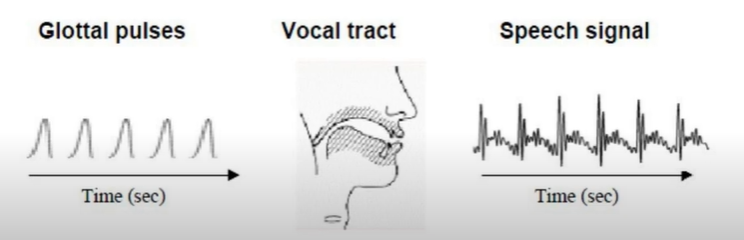

### Speech = Convolution of vocal tract frequency response and Glottal pulse.

### We are mostly interested in the Vocal tract, which contains the main knowledge that helps us understand our data (formants), and therefore we're looking for a way to seperate the Vocal tract from the Speech wave without having the Glottal pulse as well. We do that by applying a logarithm on the amplitude (audio is perceived logarithmically and not linearly), mel-scaling, and then a transformation (Discrete cosine transform).

### Our result- the waves coefficients! (MFCCS)

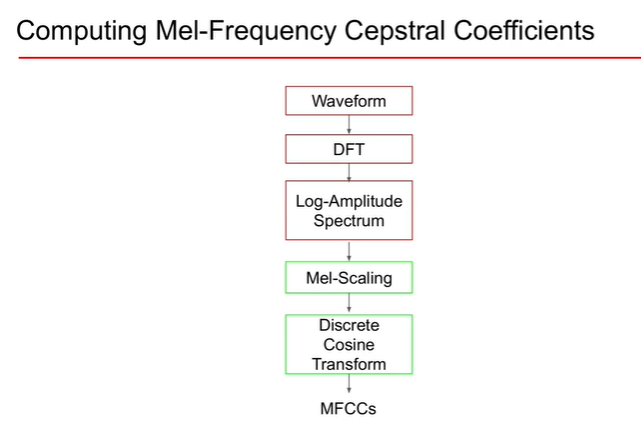

In [7]:
X, y = zip(*lst)

In [8]:
X = np.asarray(X)
y = np.asarray(y)

X.shape, y.shape

((2452, 40), (2452,))

### At this point, we can perform a normal classification, using our mfccs coefficients as our features.

### We'll start by running a Logistic regression model.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, \
                                                    random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.53      0.55        38
           2       0.51      0.58      0.54        81
           3       0.54      0.47      0.50        73
           4       0.45      0.58      0.50        71
           5       0.63      0.64      0.63        69
           6       0.61      0.53      0.56        80
           7       0.41      0.38      0.40        45
           8       0.39      0.32      0.35        34

    accuracy                           0.52       491
   macro avg       0.51      0.50      0.50       491
weighted avg       0.52      0.52      0.52       491



### Running RandomForest:

In [12]:
from sklearn.ensemble import RandomForestClassifier

reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred2 = reg.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79        38
           2       0.71      0.89      0.79        81
           3       0.83      0.62      0.71        73
           4       0.60      0.61      0.60        71
           5       0.74      0.83      0.78        69
           6       0.73      0.65      0.69        80
           7       0.56      0.56      0.56        45
           8       0.56      0.59      0.57        34

    accuracy                           0.70       491
   macro avg       0.69      0.69      0.69       491
weighted avg       0.70      0.70      0.70       491

